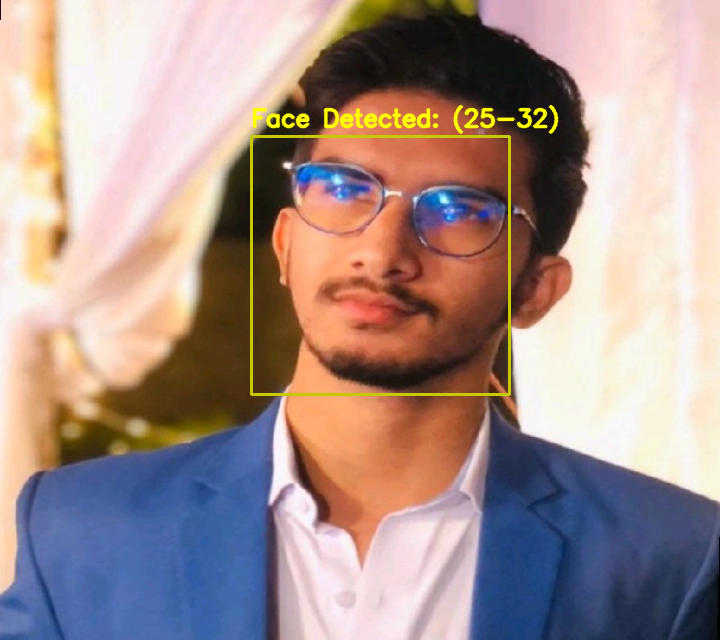

In [6]:
import cv2
import dlib
import numpy as np

# Import the necessary module for displaying images in Colab
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('/content/usman.jpg')  # Ensure this image exists in your Colab environment
if img is None:
    print("Error: Image not found. Upload 'image.jpg' to Colab first.")
else:
    img = cv2.resize(img, (720, 640))
    frame = img.copy()

    # ------------ Model for Age detection --------#
    age_weights = "/content/age_net.caffemodel"
    age_config = "/content/age_deploy.prototxt"

    try:
        age_Net = cv2.dnn.readNet(age_weights, age_config)
    except:
        print("Error: Model files not found. Upload 'age_net.caffemodel' and 'age_deploy.prototxt'.")

    # Model requirements
    ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
            '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    model_mean = (78.4263377603, 87.7689143744, 114.895847746)

    # Image dimensions
    fH, fW = img.shape[:2]

    Boxes = []  # Store face coordinates
    mssg = 'Face Detected'

    # ------------- Face Detection Model -------------#
    face_detector = dlib.get_frontal_face_detector()
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Detect faces
    faces = face_detector(img_gray)

    if not faces:  # No face detected
        mssg = 'No face detected'
        cv2.putText(img, mssg, (40, 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2)
        cv2_imshow(img)

    else:  # Faces detected
        for face in faces:
            x, y, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
            Boxes.append([x, y, x2, y2])
            cv2.rectangle(frame, (x, y), (x2, y2), (0, 200, 200), 2)

        for box in Boxes:
            face = frame[box[1]:box[3], box[0]:box[2]]

            # Preprocessing for Age Model
            blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), model_mean, swapRB=False)

            # Age Prediction
            age_Net.setInput(blob)
            age_preds = age_Net.forward()
            age = ageList[age_preds[0].argmax()]

            cv2.putText(frame, f'{mssg}: {age}', (box[0], box[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)

        cv2_imshow(frame)



# New Section